# Clustering via XAI

This notebook takes a kmeans-clustering algorithm and rewrites it as a 2-layer Neural Net, following Kauffmann et al. 2021 (https://arxiv.org/abs/1906.07633). Then, one can use XAI-techniques to analyse the NN. Kauffmann et al. propose Layer-Relevance-Propagation LRP (which will be implemented at a later stage in this notebook).

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import *
np.random.seed(1234)

In [2]:
x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
Data = np.concatenate((x,y,z), axis=1)

x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(5,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

x = np.random.normal(5,1,100).reshape(-1,1)
y = np.random.normal(-5,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100).reshape(-1,1)
z = np.random.normal(5,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

s1 = np.random.normal(0,1,400).reshape(-1,1) # superfluous data
s2 = np.random.normal(0,1,400).reshape(-1,1) # superfluous data

Data = np.concatenate((Data, s1,s2), axis =1)
np.random.shuffle(Data)
print(Data.shape)

(400, 5)


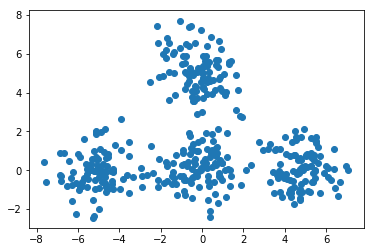

In [3]:
plt.scatter(Data[:,1], Data[:,2])

In [4]:
Data[0,:]
# should be array([ 1.38299725,  4.40664361, -0.56009295,  0.15330679,  0.03168205])

array([ 1.38299725,  4.40664361, -0.56009295,  0.15330679,  0.03168205])

In [5]:
nKM = 4 # Number of Clusters
kmeans = KMeans(n_clusters=nKM, random_state=0).fit(Data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 1.71574206e-02 -1.76319542e-01  5.06252265e+00  1.07430050e-01
   1.28495164e-01]
 [ 5.03798883e+00 -5.01356819e+00 -4.52937721e-02 -4.56142331e-03
   5.74825979e-02]
 [ 1.04955543e-01  4.80794571e+00  1.09065574e-01  1.16696186e-01
  -4.57392771e-02]
 [ 3.87275062e-02 -7.01581725e-02  1.24402617e-01  9.26459280e-02
   7.63761552e-02]]
[2 2 1 1 0 0 0 3 1 1 2 1 2 3 1 1 3 2 2 3 1 3 1 3 2 1 1 0 2 3 0 2 1 0 3 2 3
 3 3 2 1 1 2 0 3 3 3 2 1 3 1 2 0 0 3 2 1 3 1 3 1 0 3 2 0 0 3 0 1 2 0 1 0 0
 2 1 2 3 0 1 1 3 1 2 1 1 1 1 0 3 1 3 1 1 1 0 2 0 0 0 1 1 1 1 0 2 1 1 3 2 2
 2 1 1 3 1 0 3 2 2 1 2 1 1 1 3 0 0 2 0 2 0 3 2 2 3 1 3 3 2 0 1 3 0 3 2 0 2
 0 1 1 0 3 0 3 2 0 1 2 2 1 1 2 0 2 1 0 2 3 3 2 2 0 1 1 1 2 0 3 2 3 1 2 0 1
 3 3 1 1 2 1 3 0 3 3 0 3 0 3 3 3 0 3 2 1 0 0 3 0 1 1 1 3 3 3 0 3 2 0 3 2 1
 0 3 0 0 1 1 1 2 0 3 2 3 2 3 0 1 2 0 0 2 1 0 0 3 3 2 3 2 3 2 2 3 0 2 0 0 2
 3 2 0 1 1 3 2 0 0 0 1 0 1 3 2 0 1 0 0 2 1 1 3 1 2 0 2 3 1 3 0 1 2 0 1 2 0
 3 3 0 2 1 1 2 0 0 1 2 0 2 2 0 3 0 3 3 0 3 0 1 0 0 0 3 0 1 

## Neuralising K-Means

We neuralise the clustering classifier with respect to class 0, i.e. write a net that should tell us whether an instance belongs to class 0 or not.

In [6]:
def layer1(x, centroids, i):
    # takes one instance x, centroid-matrix and index of ith centroid
    # returns values for the distances to centroid i
    mu_c = centroids[i]
    w = 2*(mu_c - centroids)
    b = (centroids**2.).sum(1) - (mu_c**2.).sum()
    h = w.dot(x) + b
    return(h)
x = np.ones(Data.shape[1])
layer1(x, kmeans.cluster_centers_, 0)
    

array([  0.        ,  35.04847864,  -2.44088379, -15.8976728 ])

In [7]:
def layer2(h):
    return(min(h) >= 0)

for i in range(nKM):
    print(layer2(layer1(x, 
                   kmeans.cluster_centers_,
                   i)))

False
False
False
True


In [8]:
def layer2(h,i):
    # i is the index of the cluster which we "test" here
    Indices = np.arange(len(h))
    return(min(h[Indices!=i]) )

def DecisionLayer(Minimum):
    return(Minimum > 0)


for i in range(nKM):
    print(DecisionLayer(layer2(layer1(x, 
                   kmeans.cluster_centers_,
                   i),i)))

False
False
False
True


### Testing this 2-Layer-NN

In [9]:
X = np.random.multivariate_normal(np.ones(Data.shape[1])*2.5, 
                              np.eye(Data.shape[1]), 
                              size=1000)
Cluster_Pred = kmeans.predict(X)

In [10]:
# Now predict via the layers
Layer_Pred = np.empty(1000)



for i in range(1000):
    for j in range(nKM):
        Decision = DecisionLayer(layer2(layer1(X[i,:],
                                               kmeans.cluster_centers_,
                                               j),
                                        j))
        if Decision:
            Layer_Pred[i] = range(nKM)[j]


In [11]:
sum(Layer_Pred != Cluster_Pred)
# Very good! The numerics don't introduce any unexpected errors!

0

## Layer Relevance Propagation


In [12]:


def NN_k(x,centroids,k):
    # checks if x belongs to kth cluster
    return(layer2(layer1(x,centroids,k),k))

In [13]:
Is0 = np.empty(Data.shape[0]) # Output-array whether jth instance is assigned to cluster 0
for i in range(len(Is0)):
    Is0[i] = DecisionLayer(NN_k(Data[i,:], 
                                kmeans.cluster_centers_, 
                                0))


In [14]:
print("Should all be 0:", kmeans.labels_[Is0 == 1])
print("Should all be nonzero:",kmeans.labels_[Is0 != 1])
# Good!

Should all be 0: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Should all be nonzero: [2 2 1 1 3 1 1 2 1 2 3 1 1 3 2 2 3 1 3 1 3 2 1 1 2 3 2 1 3 2 3 3 3 2 1 1 2
 3 3 3 2 1 3 1 2 3 2 1 3 1 3 1 3 2 3 1 2 1 2 1 2 3 1 1 3 1 2 1 1 1 1 3 1 3
 1 1 1 2 1 1 1 1 2 1 1 3 2 2 2 1 1 3 1 3 2 2 1 2 1 1 1 3 2 2 3 2 2 3 1 3 3
 2 1 3 3 2 2 1 1 3 3 2 1 2 2 1 1 2 2 1 2 3 3 2 2 1 1 1 2 3 2 3 1 2 1 3 3 1
 1 2 1 3 3 3 3 3 3 3 3 2 1 3 1 1 1 3 3 3 3 2 3 2 1 3 1 1 1 2 3 2 3 2 3 1 2
 2 1 3 3 2 3 2 3 2 2 3 2 2 3 2 1 1 3 2 1 1 3 2 1 2 1 1 3 1 2 2 3 1 3 1 2 1
 2 3 3 2 1 1 2 1 2 2 2 3 3 3 3 1 3 1 2 1 1 2 3 3 2 2 2 2 3 2 1 2 3 2 3 2 2
 2 3 2 1 2 2 3 3 3 3 2 2 3 3 1 3 2 3 1 1 2 1 1 3 2 2 2 2 3 1 3 3 2 1 3 3 2
 1 3 2]


In [15]:
def beta(X, i, DecisionL, NN, Centroids):
    # Takes the Data X, a particular class i, a Decision Layer DecisionL and Neuralised kmeans NN = NN(x,centroids,k)
    # Returns the beta-scaling factor from eq. (3)
    IS_i = np.empty(X.shape[0])
    
    for j in range(X.shape[0]):
        IS_i[j] = NN(X[j,:],
                     Centroids,
                     i)
    return( np.mean(IS_i)**(-1.))
    

In [16]:
# just for testing purposes 
Beta = beta(Data, 3, DecisionLayer, NN_k, kmeans.cluster_centers_)
print(Beta)

-0.050356586650341914


In [17]:
## IMPLEMENT EQUATION (2)


#For one particular data point x
x = np.zeros(Data.shape[1])
x[0] = 4.5
x[1] = -2.



#### Try to modularise the LRP


In [18]:
## IMPLEMENT EQUATION (2)



def Eq2(X, Centroids, c, beta):
    # take one Data.point X, the cluster Centroids and the cluster of interest c, scaling factor beta
    # output: R_k - array as in equation (2)
    
    n_C = Centroids.shape[0]
    
    H_k = layer1(X, Centroids, c)
    F_c = layer2(H_k, c)
    
    # numerator of eq. (2)
    r_k_func = np.exp(-beta * H_k) * F_c
    
    R_k_out = r_k_func / sum(r_k_func[np.arange(n_C) != c])
    #print(range(n_C), range(n_C) != c)
    return(R_k_out)
print(x)

print(Eq2(x, kmeans.cluster_centers_, 
          kmeans.predict(x.reshape(1, -1)),
          Beta))
print(Eq2(x, kmeans.cluster_centers_, 3, Beta))


[ 4.5 -2.   0.   0.   0. ]
[0.27882562 0.03776208 0.64366225 0.07751213]
[0.29036775 0.03932526 0.67030699 0.08072078]


In [19]:
def Eq4(X, Centroids, c, beta):

    n_C = Centroids.shape[0]
    Index = (np.arange(n_C) != c) # index of "all clusters except c"
    
    R_previous = Eq2(X, Centroids, c, beta) # from Equation (2)
    R_previous_reduced = R_previous[Index]
    MU_c = Centroids[c]
    M_k = 0.5*(Centroids + MU_c)
    DIFF_x_m = X - M_k
    
    DIFF_x_m_reduced = DIFF_x_m[Index]
    
    W = 2*(MU_c - Centroids)
    W_reduced = W[Index]
    
    Prod = np.multiply(DIFF_x_m_reduced, W_reduced)
    
    R_InputLayer = np.zeros(len(X)) # relevance of each input-feature
    
    for i in range(len(R_InputLayer)):
        for k in range(n_C-1):
            R_InputLayer[i] += Prod[k,i] * R_previous_reduced[k] / np.sum(Prod[k,:])
    
    return(R_InputLayer)

## MAIN FUNCTION

The function xai_clust combines everything from the above. It includes the beta-selection as of equation (3).

In [20]:

def xai_clust(X, Centroids, X_Label, Dat, DecisionL, Neuralised):

    return(Eq4(X, Centroids,  X_Label,
           beta(Dat, X_Label, DecisionL, Neuralised, Centroids)))


#### Let's try out different cluster assignments
By varying the parameter i, we can see which features of x would influence the decision towards i, if i actually was the predicted cluster. Note that this XAI-method does not tell us which cluster has actually been selected, one has to specify this (e.g. as i=kmeans.predict(x.reshape(-1,1)

In [21]:
x = np.zeros(Data.shape[1])
x[0] = 4.5
x[1] = -2.
print("x", x)
print("Predicted label is", kmeans.predict(x.reshape(1,-1))[0])

for i in range(kmeans.cluster_centers_.shape[0]):
    print(i,xai_clust(x, kmeans.cluster_centers_, i, Data, DecisionLayer, NN_k).round(1))

x [ 4.5 -2.   0.   0.   0. ]
Predicted label is 1
0 [ 0.   1.8 -0.8  0.  -0. ]
1 [0.6 0.2 0.2 0.  0. ]
2 [ 0.   1.8 -0.8  0.  -0. ]
3 [0.  0.7 0.3 0.  0. ]


In [22]:
print("Compared to the centroids:")
print(kmeans.cluster_centers_.round(1))

Compared to the centroids:
[[ 0.  -0.2  5.1  0.1  0.1]
 [ 5.  -5.  -0.  -0.   0.1]
 [ 0.1  4.8  0.1  0.1 -0. ]
 [ 0.  -0.1  0.1  0.1  0.1]]


Note that for the truly predcited label, the XAI attributes high relevance for x[0]. That makes sense, because both x[0] and the associated centroid are much larger than the 0th feature of all other centroids. 

#### And another example

Now for something that is in-between the clusters 1 and 3: What will happen now?

In [23]:
x_none = np.array([0., 5, 5, 0.1, 0.1])
print(x_none, kmeans.predict(x_none.reshape(1,-1)))

[0.  5.  5.  0.1 0.1] [2]


In [24]:
for i in range(kmeans.cluster_centers_.shape[0]):
    print(i, xai_clust(x_none, kmeans.cluster_centers_, i, Data, DecisionLayer, NN_k).round(1))

0 [ 0.2  0.7  0.1  0.  -0. ]
1 [ 0.2  0.7  0.1  0.  -0. ]
2 [ 0.2  1.2 -0.4  0.  -0. ]
3 [0.2 0.7 0.  0.  0. ]


In [25]:
print("Explanation of the real prediction x_hat =", kmeans.predict(x_none.reshape(1,-1))[0])
print(xai_clust(x_none, kmeans.cluster_centers_, 
                kmeans.predict(x_none.reshape(1,-1))[0],
                Data, DecisionLayer, NN_k).round(1))

Explanation of the real prediction x_hat = 2
[ 0.2  1.2 -0.4  0.  -0. ]


Interstingly, this clearly out-of-sample instance has absolute relevance values above 1. May this be a sign of the instance not being in any of the known clusters, i.e. an outlier or new cluster?

#### Randomised Example

In [26]:
np.random.seed(1234)
x_rand = np.random.normal(2,2,5)

print(x_rand, kmeans.predict(x_rand.reshape(1,-1)))

print("Cluster Centers:")
print(kmeans.cluster_centers_.round(1))
print("Explanation:", xai_clust(x_rand, kmeans.cluster_centers_, 
                kmeans.predict(x_rand.reshape(1,-1))[0],
                Data, DecisionLayer, NN_k).round(1))

[ 2.94287033 -0.38195139  4.86541394  1.37469621  0.55882253] [0]
Cluster Centers:
[[ 0.  -0.2  5.1  0.1  0.1]
 [ 5.  -5.  -0.  -0.   0.1]
 [ 0.1  4.8  0.1  0.1 -0. ]
 [ 0.  -0.1  0.1  0.1  0.1]]
Explanation: [-0.   0.4  0.6  0.   0. ]


Interpretation:
This instance is assigned to its cluster mainly (high relevance value) because of its 1st and 2nd feature's value. 


## Go through entire training data

We look at the XAI values for each feature of every instance with respect to its kmeans-prediction. Then, we will plot the kernel densities of these importance values to see if the overall feature importance aligns with our knowledge about the data.

In [27]:
XAI = np.zeros(Data.shape)
Labels = np.zeros(Data.shape[0])

for i in range(Data.shape[0]):
    x = Data[i,:]
    XAI[i,:] = xai_clust(x, kmeans.cluster_centers_, kmeans.predict(x.reshape(1,-1)),
                    Data, DecisionLayer, NN_k)
    Labels[i] = kmeans.predict(x.reshape(1,-1))
print(XAI.round(1))

[[ 0.1  0.8  0.1  0.  -0. ]
 [ 0.1  0.8  0.1 -0.  -0. ]
 [ 0.3  0.7  0.1 -0.   0. ]
 ...
 [ 0.4  0.6  0.1 -0.   0. ]
 [ 0.   0.7  0.2  0.   0. ]
 [ 0.2  0.7  0.   0.   0. ]]


Cluster 0 with centroid [ 0.02 -0.18  5.06  0.11  0.13]


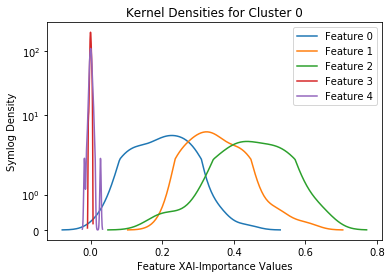

Cluster 1 with centroid [ 5.04 -5.01 -0.05 -0.    0.06]


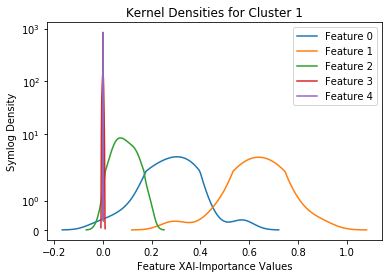

Cluster 2 with centroid [ 0.1   4.81  0.11  0.12 -0.05]


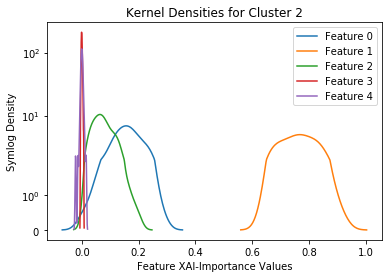

Cluster 3 with centroid [ 0.04 -0.07  0.12  0.09  0.08]


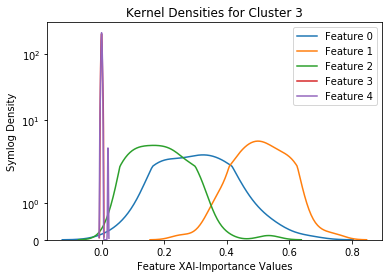

In [28]:
import warnings
warnings.filterwarnings("ignore")

for i in range(nKM):
    print("Cluster", i, "with centroid", kmeans.cluster_centers_[i].round(2))
    plt.yscale("symlog", linthresh=1)
    for j in range(Data.shape[1]):
        sns.kdeplot(XAI[Labels==i,j], label="Feature " +str(j))
    plt.title("Kernel Densities for Cluster "+str(i))
    plt.ylabel("Symlog Density")
    plt.xlabel("Feature XAI-Importance Values")
    plt.legend()
    plt.show()

As it should, no cluster has any meaningful importance for features 3 and 4. The clusters with clearly nonzero values for some of their centroid's features assign the highest importance to those nonzero features, which makes sense.